# **FEATURE SELECTION: LASSO AND RIDGE REGRESSION**

Explore the basics of lasso and ridge regression! After establishing a baseline using linear regression, pay attention to how lasso and ridge regression change the coefficients.

In [0]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy as sp
from scipy import stats
import seaborn; seaborn.set_style('whitegrid') 
%matplotlib inline

In [0]:
#upload dataset
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
#replace 'Male' and 'Female' values with 0s and 1s
df['Gender'] = df['Gender'].replace("Male", 0).replace("Female", 1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


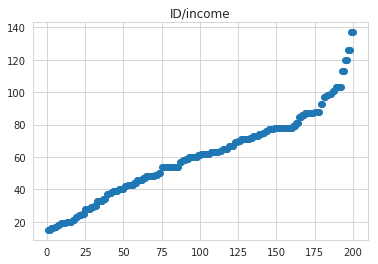

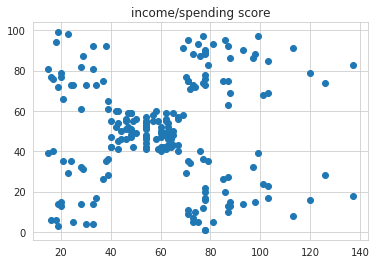

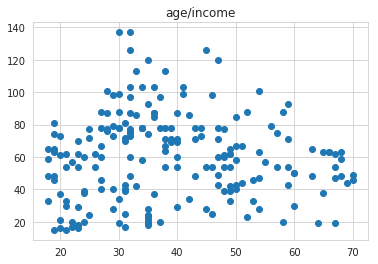

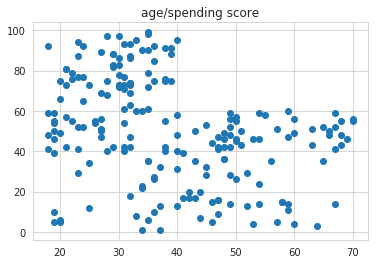

In [0]:
#visualize
plt.scatter(df['CustomerID'], df['Annual Income (k$)'])
plt.title('ID/income')
plt.show()
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('income/spending score')
plt.show()
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.title('age/income')
plt.show()
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.title('age/spending score')
plt.show()

In [0]:
#split into features and output
X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]

#split into training and testing
x_train = X.iloc[:179, :]
x_test = X.iloc[180:, :]
y_train = Y.iloc[:179, :]
y_test = Y.iloc[180:, :]

In [0]:
#import to prep for variance threshold & regressions
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

**VARIANCE THRESHOLD**

Perform variance threshold on the entire dataset and display the results. Here, Gender is the only column that is dropped, as the variance did not meet the set threshold of 0.5

In [0]:
#perform variance threshold on the entire dataset
threshold_obj = VarianceThreshold(threshold=0.5)

x = threshold_obj.fit_transform(df)

#display the first five rows of data
x[0:5]

array([[ 1, 19, 15, 39],
       [ 2, 21, 15, 81],
       [ 3, 20, 16,  6],
       [ 4, 23, 16, 77],
       [ 5, 31, 17, 40]])

In [0]:
#create linear, lasso, and ridge objects
lm = LinearRegression()
lasso = Lasso(alpha=5)
ridge = Ridge(alpha=5)

**LINEAR REGRESSION**

Perform linear regression. This will act as a baseline, to see how ridge and lasso regressions change the results. Pay attention to the coefficients-- consider the linear regression values the "baseline," and consider how ridge and lasso regression affect these coefficients.

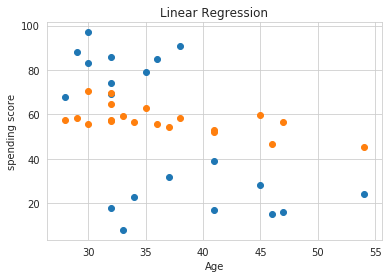

array([[-0.18715667,  2.37204217, -0.56173808,  0.45596706]])

In [0]:
#fit the model to the training set
lm_fit = lm.fit(x_train, y_train)
#predict the testing set
lm_y_predict = lm.predict(x_test)

#display results
plt.scatter(x_test['Age'], y_test)
plt.scatter(x_test['Age'], lm_y_predict)
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('spending score')

plt.show()

lm.coef_

**RIDGE REGRESSION**

Perform ridge regression on the data and display the results. Note how the coefficients have changed from the original, as has the scatterplot.

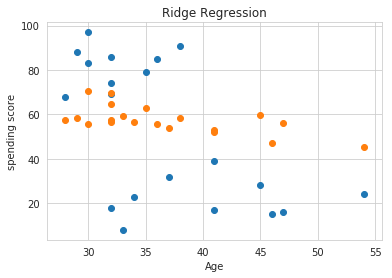

array([[-0.18663116,  2.12795776, -0.56227322,  0.45410481]])

In [0]:
#ridge regression

#fit the model to the training set
ridge.fit(x_train, y_train)
#predict y values for the testing set
ridge_y_predict = ridge.predict(x_test)

#display results
plt.scatter(x_test['Age'], y_test)
plt.scatter(x_test['Age'], ridge_y_predict)
plt.title('Ridge Regression')
plt.xlabel('Age')
plt.ylabel('spending score')
plt.show()

ridge.coef_

**LASSO REGRESSION**

Perform lasso regression on the data and plot the results. Note how several of the coefficients have become zero in this model.

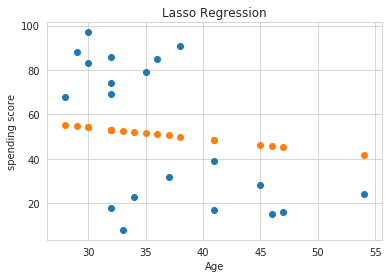

array([-0.00376025,  0.        , -0.52536748,  0.        ])

In [0]:
#fit the model based on the training set
lasso.fit(x_train, y_train)
#predict y values based on lasso regression
lasso_y_predict = lasso.predict(x_test)

#display results
plt.scatter(x_test['Age'], y_test)
plt.scatter(x_test['Age'], lasso_y_predict)
plt.title('Lasso Regression')
plt.xlabel('Age')
plt.ylabel('spending score')
plt.show()

lasso.coef_

**RIDGE REGRESSION TRACE PLOT**

Create a ridge regression trace plot. This allows you to visualize how a change in the lambda value will impact the coefficients returned after ridge regression. While this dataset did not create a particularly interesting trace plot, the general idea holds.

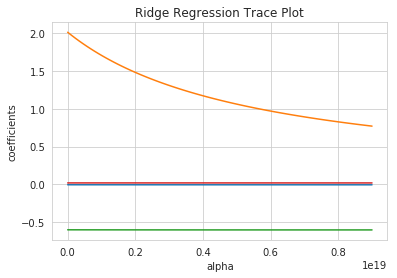

In [0]:
coefficients =[]
nums = np.linspace(1, 9000000000000000000, 80)

for i in range(len(nums)):
  ridge.set_params(alpha=i)
  ridge.fit(X, Y)
  coefficients.append(ridge.coef_[0])

plt.plot(nums, coefficients)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge Regression Trace Plot')
plt.show()

#based on this dataset, the trace plot isn't particularly informative but you get the general idea
